# Mixed Integer Programming
- Type of linear programming where some variables can be integer.

Maximize x + 10y subject to the following constraints:
- x + 7y ≤ 17.5
- 0 ≤ x ≤ 3.5
- 0 ≤ y
- x, y integers

Solvers: 
- MPSolver: Pure MIP
- CP-SAT: ILP with continuous vars
- SCIP: MIP with integer and continuous (SCIP)

### Integer Vars 

In [22]:
from ortools.linear_solver import pywraplp
solver = pywraplp.Solver.CreateSolver("SAT") # CP-SAT
infinity = solver.infinity()
x = solver.IntVar(0.0, infinity, "x")
y = solver.IntVar(0.0, infinity, "x")
solver.Add(x + 7 * y <= 17.5)
solver.Add(x <= 3.5)
solver.Maximize(x + 10 * y)
status = solver.Solve()
if status == pywraplp.Solver.OPTIMAL:
    print(solver.Objective().Value())
    print(x.solution_value())
    print(y.solution_value())
    print(solver.wall_time()) # milliseconds
    print(solver.iterations())
    print(solver.nodes())
    print(solver.NumConstraints())

23.0
3.0
2.0
4
0
0
2


### Continous Vars 

In [31]:
from ortools.linear_solver import pywraplp
solver = pywraplp.Solver.CreateSolver("GLOP") # CP-SAT
infinity = solver.infinity()
x = solver.NumVar(0.0, infinity, "x")
y = solver.NumVar(0.0, infinity, "x")
solver.Add(x + 7 * y <= 17.5)
solver.Add(x <= 3.5)
solver.Maximize(x + 10 * y)
status = solver.Solve()
if status == pywraplp.Solver.OPTIMAL:
    print(solver.Objective().Value())
    print(x.solution_value())
    print(y.solution_value())
    print(solver.wall_time()) # milliseconds
    print(solver.iterations())
    print(solver.nodes())
    print(solver.NumConstraints())

25.0
0.0
2.5
1
0
-1
2


E0000 00:00:1733016706.653485  237721 glop_interface.cc:257] Number of nodes only available for discrete problems


### Mixed

In [34]:
from ortools.linear_solver import pywraplp
solver = pywraplp.Solver.CreateSolver("SAT") # CP-SAT
infinity = solver.infinity()
x = solver.IntVar(0.0, infinity, "x")
y = solver.NumVar(0.0, infinity, "x")
solver.Add(x + 7 * y <= 17.5)
solver.Add(x <= 3.5)
solver.Maximize(x + 10 * y)
status = solver.Solve()
if status == pywraplp.Solver.OPTIMAL:
    print(solver.Objective().Value())
    print(x.solution_value())
    print(y.solution_value())
    print(solver.wall_time()) # milliseconds
    print(solver.iterations())
    print(solver.nodes())
    print(solver.NumConstraints())

25.0
-0.0
2.5
4
0
0
2


### Large

Maximize 7x1 + 8x2 + 2x3 + 9x4 + 6x5 subject to the following constraints:

5 x1 + 7 x2 + 9 x3 + 2 x4 + 1 x5 ≤ 250

18 x1 + 4 x2 - 9 x3 + 10 x4 + 12 x5 ≤ 285

4 x1 + 7 x2 + 3 x3 + 8 x4 + 5 x5 ≤ 211

5 x1 + 13 x2 + 16 x3 + 3 x4 - 7 x5 ≤ 315

where x1, x2, ..., x5 are non-negative integers.



In [45]:
from ortools.linear_solver import pywraplp
solver = pywraplp.Solver.CreateSolver("SAT")

def create_data_model():
    data = {}
    data["constraint_coeffs"] = [
        [5, 7, 9, 2, 1], 
        [18, 4, -9, 10, 12],
        [4, 7, 3, 8, 5],
        [5, 13, 16, 3, -5]
    ]
    data["bounds"] = [250, 285, 211, 315]
    data["obj_coeffs"] = [7, 8, 2, 9, 6]
    data["num_vars"] = 5
    data["num_constraints"] = 4
    return data

data = create_data_model()
solver = pywraplp.Solver.CreateSolver("SCIP")
infinity = solver.infinity()
x = {}
for j in range(data["num_vars"]):
    x[j] = solver.IntVar(0, infinity, "x[%i]" % j)
print("Number of variables = ", solver.NumVariables())

for i in range(data["num_constraints"]):
    constraint = solver.RowConstraint(0, data["bounds"][i], "")
    for j in range(data["num_vars"]):
        constraint.SetCoefficient(x[j], data["constraint_coeffs"][i][j])
print("Number of constraints", solver.NumConstraints())

objective = solver.Objective()
for j in range(data["num_vars"]):
    objective.SetCoefficient(x[j], data["obj_coeffs"][j])
objective.SetMaximization()

status = solver.Solve()

if status == pywraplp.Solver.OPTIMAL:
    print(solver.Objective().Value())
    for j in range(data["num_vars"]):
        print(x[j].name(), " = ", x[j].solution_value())
    print(solver.wall_time()) # milliseconds
    print(solver.iterations())
    print(solver.nodes())

Number of variables =  5
Number of constraints 4
260.00000000000006
x[0]  =  8.0
x[1]  =  21.0
x[2]  =  0.0
x[3]  =  2.0
x[4]  =  3.0
9
42
1


(CVXPY) Dec 01 07:45:30 AM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Dec 01 07:45:30 AM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')


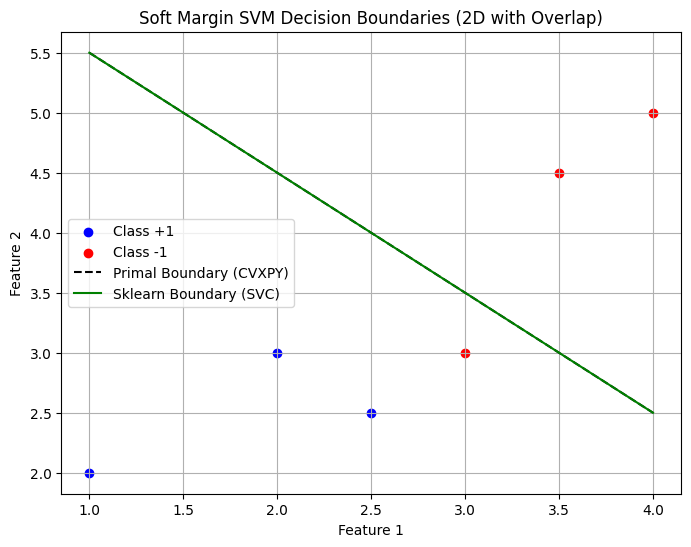

Primal (CVXPY):
w: [-0.66668299 -0.66665035], b: 4.3333170365472204

Sklearn (SVC):
w: [-0.66666667 -0.66666667], b: 4.333333333333333

Difference:
w_diff: 2.30740903758951e-05
b_diff: 1.6296786112590667e-05


In [46]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Generate synthetic data that requires a soft margin (overlapping classes)
np.random.seed(42)
X = np.array([[1, 2], [2, 3], [3, 3], [4, 5], [2.5, 2.5], [3.5, 4.5]])  # Some overlap
y = np.array([1, 1, -1, -1, 1, -1])  # Binary labels with overlap

# Primal Soft-Margin SVM Formulation using CVXPY
w = cp.Variable(2)
b = cp.Variable()
slack = cp.Variable(len(y))  # Slack variables for soft margin
C = 1  # Regularization parameter

# Constraints: Include slack variables to allow margin violations
constraints = [
    y[i] * (w @ X[i] + b) >= 1 - slack[i] for i in range(len(y))
] + [slack >= 0]  # Slack variables must be non-negative

# Objective: Minimize ||w||^2 with penalty for slack variables
objective = cp.Minimize(0.5 * cp.norm(w)**2 + C * cp.sum(slack))
problem = cp.Problem(objective, constraints)
problem.solve()

# Extract primal solution
w_primal = w.value
b_primal = b.value

# Solve using sklearn's SVC for comparison
svm = SVC(kernel='linear', C=C)  # Soft margin SVM with regularization
svm.fit(X, y)
w_sklearn = svm.coef_[0]  # SVC provides w
b_sklearn = svm.intercept_[0]

# Visualization
plt.figure(figsize=(8, 6))

# Scatter plot of data points
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class +1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', label='Class -1')

# Plot decision boundary from primal solution
x1_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2_vals_primal = (-w_primal[0] * x1_vals - b_primal) / w_primal[1]
plt.plot(x1_vals, x2_vals_primal, 'k--', label='Primal Boundary (CVXPY)')

# Plot decision boundary from sklearn's SVC
x2_vals_sklearn = (-w_sklearn[0] * x1_vals - b_sklearn) / w_sklearn[1]
plt.plot(x1_vals, x2_vals_sklearn, 'g-', label='Sklearn Boundary (SVC)')

# Labels, legend, and grid
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Soft Margin SVM Decision Boundaries (2D with Overlap)')
plt.legend()
plt.grid(True)
plt.show()

# Print results
print("Primal (CVXPY):")
print(f"w: {w_primal}, b: {b_primal}")

print("\nSklearn (SVC):")
print(f"w: {w_sklearn}, b: {b_sklearn}")

print("\nDifference:")
print(f"w_diff: {np.linalg.norm(w_primal - w_sklearn)}")
print(f"b_diff: {np.abs(b_primal - b_sklearn)}")
